In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/datsoftlyngby/soft2019spring-ai/master/projects/project1/users.json'
df = pd.read_json(url)
df.head(10)

,about,created,error,id,karma,submitted
0,NaN,1.510266e+09,NaN,gcgggfxsdg,-1.0,5
1,"Ruby, Open Source, Devops",1.325548e+09,NaN,sheerun,102.0,51
2,NaN,1.459331e+09,NaN,keypress,79.0,70
3,[ my public key: https:&#x2F;&#x2F;keybase.io&...,1.379698e+09,NaN,pyprism,1356.0,114
4,Email: ejstronge@gmail.com\nGithub: https:&#x2...,1.355740e+09,NaN,ejstronge,460.0,144
5,NaN,1.276201e+09,NaN,akira2501,880.0,304
6,NaN,1.382222e+09,NaN,matchagaucho,412.0,228
7,NaN,1.330724e+09,NaN,bberrry,273.0,49
8,NaN,1.475393e+09,NaN,sharjeelsidd,1.0,1
9,github.com&#x2F;allcentury,1.389810e+09,NaN,allcentury,56.0,41


In [4]:
xtime = df.loc[:, 'created']
df = df[df['created'].notnull()]
X = np.array(df['created']).reshape(9299, 1)

In [5]:
ypoint = df.loc[:, 'karma']
df = df[df['karma'].notnull()]
y = np.array(df['karma'])

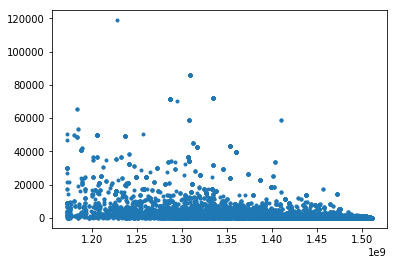

In [6]:
plt.plot(X, y, '.')

Model Selection: We've chosen to use a linear regression model because we can't exactly determine a correlation between the points gained and the time it takes to get to 1000, so we go with the suggested model by the assignment

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
prediction = model.predict(X_test)
prediction

array([6790.37378978, 7537.20219236, 7154.23331371, ..., 4639.63369152,
       5896.96447282, 5905.49106938])

In [10]:
len(prediction)

3069

In [11]:
coefficient = model.coef_
intercept = model.intercept_
print ("Coefficient:",coefficient)
print ("Intercept:",intercept)

Coefficient: [-3.70900589e-05]
Intercept: 55271.935993934676


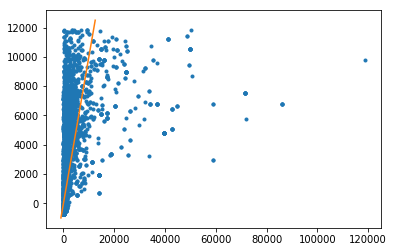

In [12]:
y_pred = prediction
plt.plot(y_test, y_pred, '.')
x_axis = np.linspace(-1000, 12500, 3069)
y_axis = x_axis
plt.plot(x_axis, y_axis)
plt.show()

In [13]:
zpost = df.loc[:, 'submitted']
df = df[df['submitted'].notnull()]
Z = np.array(df['submitted']).reshape(9299, 1)

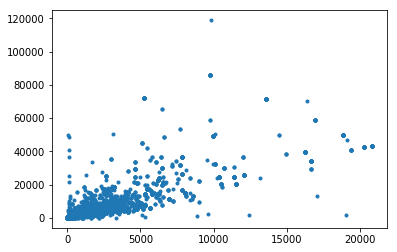

In [27]:
plt.plot(Z, y, '.')

In [28]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z, y, test_size=0.33, random_state=42, shuffle=True)

In [32]:
model_z = LinearRegression()
model_z.fit(Z_train, yz_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
prediction_z = model_z.predict(Z_test)
prediction_z

array([47095.14228734,  1122.05981496,   264.09487808, ...,
        1459.71053205,  8564.21373514,  3950.57647782])

In [34]:
len(prediction_z)

3069

In [44]:
coefficient_z = model_z.coef_
intercept_z = model_z.intercept_
print ("Coefficient:",coefficient_z)
print ("Intercept:",intercept_z)

Coefficient: [2.76762883]
Intercept: 214.27755916513388


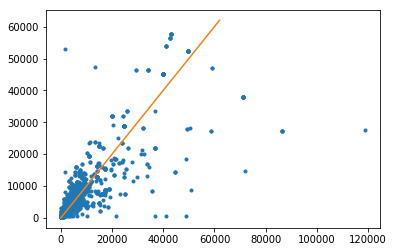

In [45]:
yz_pred = prediction_z
plt.plot(yz_test, yz_pred, '.')
xz_axis = np.linspace(0, 62000, 3069)
yz_axis = xz_axis
plt.plot(xz_axis, yz_axis)
plt.show()

Using sklearn with multidimensional input and output samples (e.g. vectors)

In [14]:
X_1 = X.flatten()
X_2 = Z.flatten()
Y = y.flatten()

In [15]:
from pandas import DataFrame 

modelxyz = {'created': X_1, 'submitted': X_2, 'karma': Y}
df_m = DataFrame(modelxyz, columns=['created','submitted','karma'])
X_mutil = df_m[['created','submitted']].astype(object)
y_mutil = df_m['karma'].astype(object)

In [16]:
X_trainMutil, X_testMutil, y_trainMutil, y_testMutil = train_test_split(X_mutil, y_mutil, test_size=0.33, random_state=42, shuffle=True)

In [17]:
modelMutil = LinearRegression()
modelMutil.fit(X_trainMutil, y_trainMutil)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
predictionMutil = modelMutil.predict(X_testMutil)
predictionMutil

array([46330.21478189,  1790.29855459,   893.28291085, ...,
        1637.98991383,  8748.5827471 ,  4267.76016908])

In [19]:
len(predictionMutil)

3069

In [20]:
coefficientMutil = modelMutil.coef_
interceptMutil = modelMutil.intercept_
print ("Coefficient:",coefficientMutil)
print ("Intercept:",interceptMutil)

Coefficient: [-6.14858271e-06  2.68880388e+00]
Intercept: 8821.568305901803


3D

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

In [50]:
model3D = smf.ols(formula='submitted ~ created + karma', data=df_m)
results_formula = model3D.fit()
results_formula.params

Intercept    3291.708305
created        -0.000002
karma           0.250053
dtype: float64

In [51]:
x_surf, y_surf = np.meshgrid(np.linspace(df_m.created.min(), df_m.created.max(), 100),np.linspace(df_m.karma.min(), df_m.karma.max(), 100))
onlyX = DataFrame({'created': x_surf.ravel(), 'karma': y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

<IPython.core.display.Javascript object>


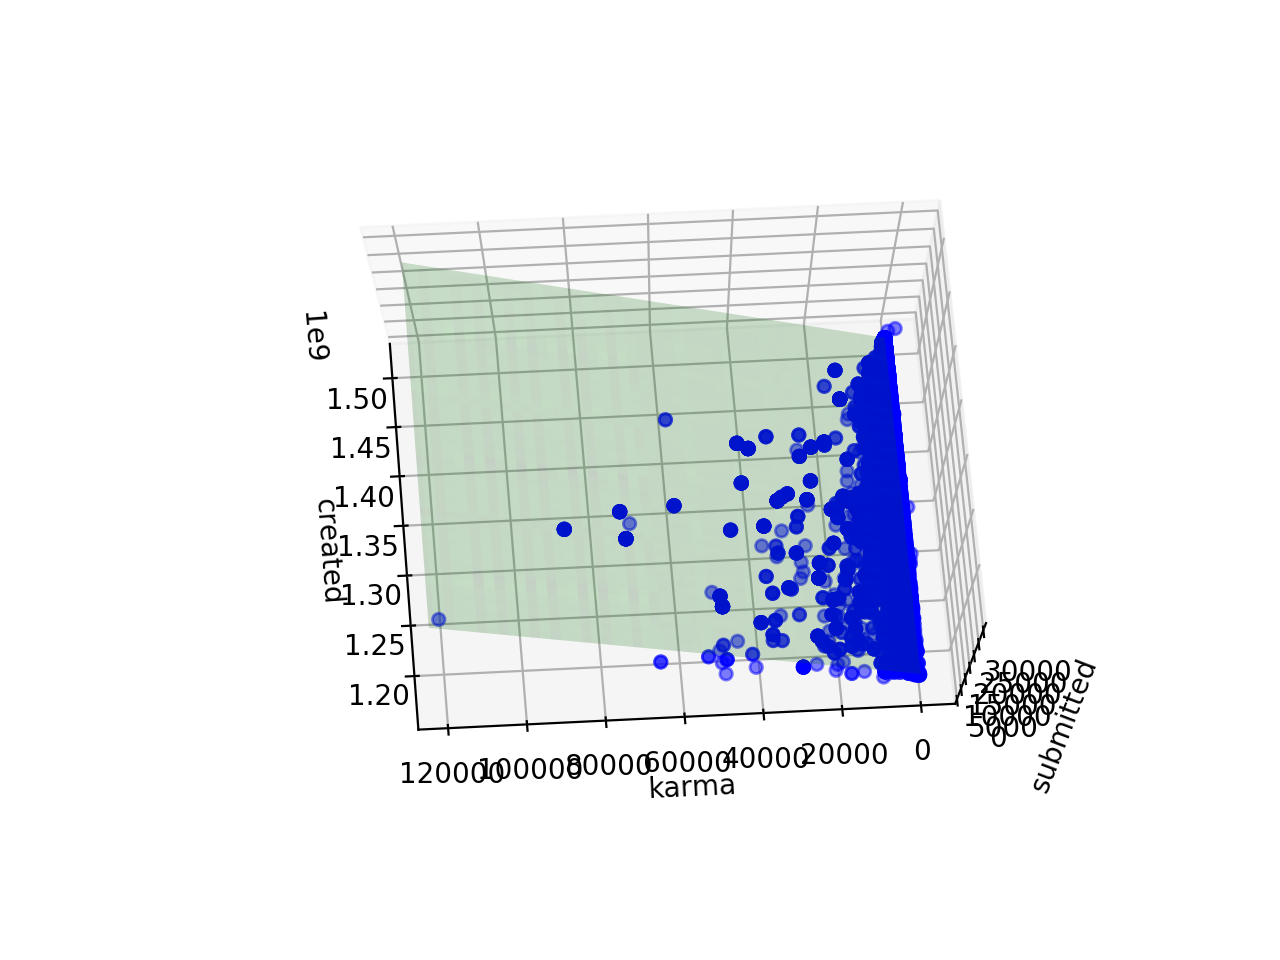

In [74]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_m['created'], df_m['karma'], df_m['submitted'], c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.values.reshape(x_surf.shape), color='green', alpha=0.2)
ax.set_xlabel('created')
ax.set_ylabel('karma')
ax.set_zlabel('submitted')
plt.show()